Лабораторна робота №3

Студента групи МІТ-31 (підгрупа 2)

Фуркала Олександра Олександровича

Завдання 1

Accuracy: 0.94
Precision: 0.99
Recall: 0.88
F1-Score: 0.93
AUC-ROC: 0.98
Confusion Matrix:
[[103   1]
 [ 12  84]]


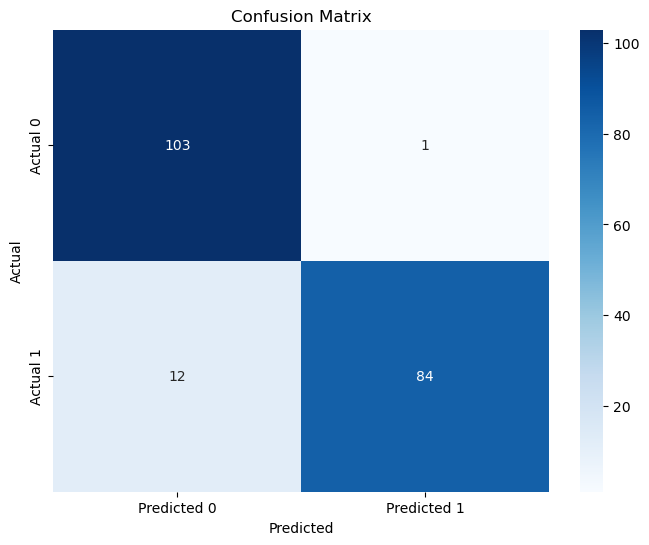

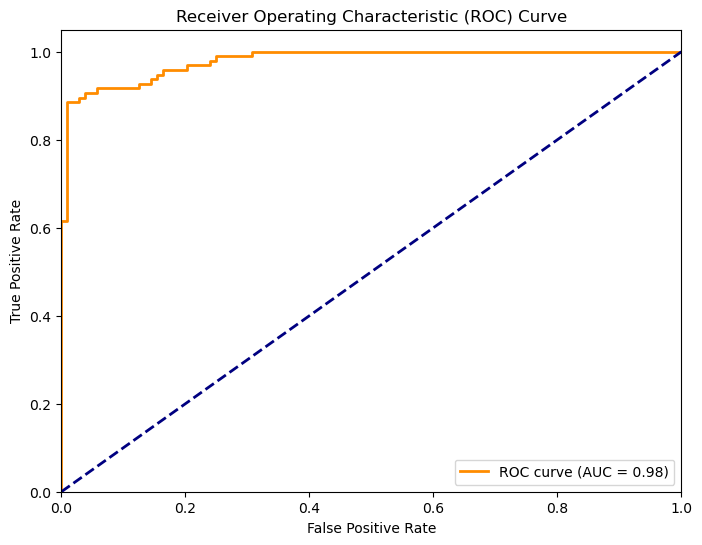

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

np.random.seed(0)

n_informative = 2 
n_redundant = 0   
n_classes = 2
n_clusters_per_class = 1
random_state = 42

X, y = make_classification(
    n_samples=1000,
    n_features=n_informative + n_redundant,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_classes=n_classes,
    n_clusters_per_class=n_clusters_per_class,
    random_state=random_state
)

data1 = pd.DataFrame(data=X, columns=["Feature1", "Feature2"])
data1["Label"] = y  
data1.to_csv("Lab3Task1data.csv", index=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = SVC(probability=True)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Завдання 2

Results for Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

   Feature 1       0.78      0.79      0.78        57
   Feature 2       0.62      0.61      0.62        49
   Feature 3       0.80      0.74      0.76        53
       Label       0.76      0.83      0.79        41

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



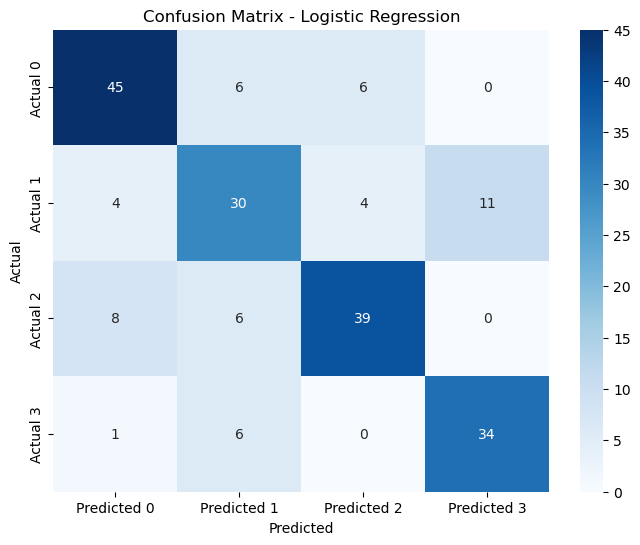



Results for Random Forest:
Classification Report:
               precision    recall  f1-score   support

   Feature 1       0.89      0.86      0.88        57
   Feature 2       0.80      0.88      0.83        49
   Feature 3       0.88      0.81      0.84        53
       Label       0.93      0.95      0.94        41

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



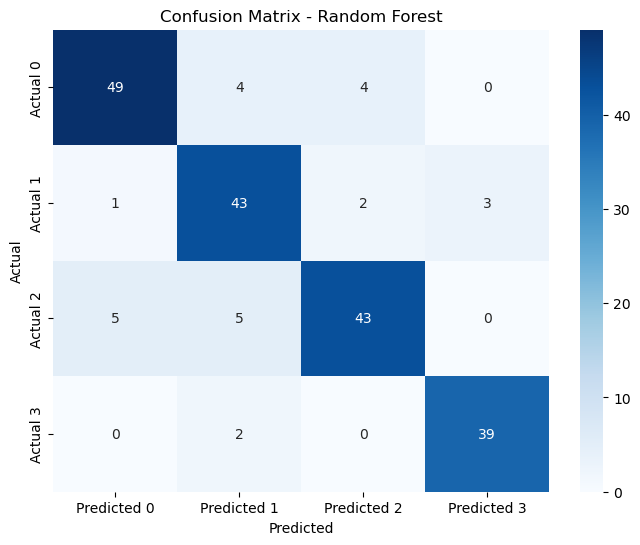



Results for Support Vector Machine:
Classification Report:
               precision    recall  f1-score   support

   Feature 1       0.87      0.81      0.84        57
   Feature 2       0.64      0.69      0.67        49
   Feature 3       0.83      0.75      0.79        53
       Label       0.76      0.85      0.80        41

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



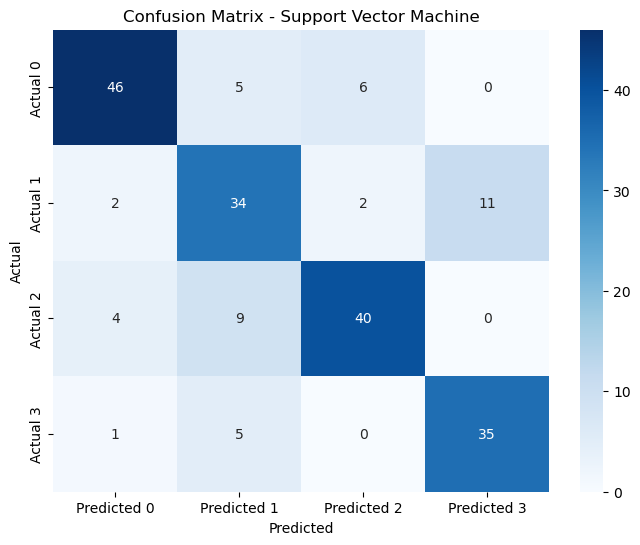

In [11]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

n_classes = 4  
n_samples = 1000  
n_informative = 3 
n_redundant = 0  
n_clusters_per_class = 1  
random_state = 42

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_informative + n_redundant,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_classes=n_classes,
    n_clusters_per_class=n_clusters_per_class,
    random_state=random_state
)

data2 = pd.DataFrame(data=X, columns=["Feature1", "Feature2", "Feature3"])
data2["Label"] = y  
data2.to_csv("Lab3Task2data.csv", index=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_classifier.fit(X_train, y_train)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train, y_train)

classifiers = {
    "Logistic Regression": lr_classifier,
    "Random Forest": rf_classifier,
    "Support Vector Machine": svm_classifier,
}

for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)  
    print(f"Results for {name}:")
    report = classification_report(y_test, y_pred, target_names=["Feature 1", "Feature 2", "Feature 3", "Label"])
    print("Classification Report:\n", report)
    confus_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confus_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"], yticklabels=["Actual 0", "Actual 1", "Actual 2", "Actual 3"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    print("\n")